# Create Randomized List of Cities

In [41]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
# Import citipy
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

# Get City Weather Data

In [46]:
# Import requests library and API key
import requests
from config import weather_api_key

In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [51]:
# Set up basic URL with api key
url = f'http://api.openweathermap.org/data/2.5/weather?unit=Imperial&appid={weather_api_key}'

In [52]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | miquelon
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | marawi
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | sobolevo
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | nyurba
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | dhidhdhoo
Processing Record 18 of Set 1 | mentok
City not found. Skipping...
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21

Processing Record 35 of Set 4 | yellowknife
Processing Record 36 of Set 4 | ancud
Processing Record 37 of Set 4 | belyy yar
Processing Record 38 of Set 4 | sao joao da barra
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | saucillo
Processing Record 42 of Set 4 | cacu
Processing Record 43 of Set 4 | shirokiy
Processing Record 44 of Set 4 | priargunsk
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 48 of Set 4 | morondava
Processing Record 49 of Set 4 | antalaha
Processing Record 50 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | aswan
Processing Record 2 of Set 5 | okha
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | xai-xai
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | simao
Processing Recor

Processing Record 24 of Set 8 | cocobeach
Processing Record 25 of Set 8 | palmer
Processing Record 26 of Set 8 | balikpapan
Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | praxedis guerrero
Processing Record 29 of Set 8 | tokur
Processing Record 30 of Set 8 | mittagong
Processing Record 31 of Set 8 | lucapa
Processing Record 32 of Set 8 | kenora
Processing Record 33 of Set 8 | filadelfia
Processing Record 34 of Set 8 | tilichiki
Processing Record 35 of Set 8 | marabba
Processing Record 36 of Set 8 | san jose
Processing Record 37 of Set 8 | thurso
Processing Record 38 of Set 8 | jiazi
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | porto walter
Processing Record 41 of Set 8 | tandlianwala
Processing Record 42 of Set 8 | cururupu
Processing Record 43 of Set 8 | yenagoa
Processing Record 44 of Set 8 | santa rosa
Processing Record 45 of Set 8 | south river
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | klarup
Proc

Processing Record 15 of Set 12 | whyalla
Processing Record 16 of Set 12 | ushtobe
Processing Record 17 of Set 12 | liwale
Processing Record 18 of Set 12 | komsomolskiy
Processing Record 19 of Set 12 | sechura
Processing Record 20 of Set 12 | rumoi
Processing Record 21 of Set 12 | port shepstone
Processing Record 22 of Set 12 | tateyama
Processing Record 23 of Set 12 | fort nelson
Processing Record 24 of Set 12 | agva
City not found. Skipping...
Processing Record 25 of Set 12 | bay roberts
Processing Record 26 of Set 12 | carrefour
Processing Record 27 of Set 12 | camabatela
Processing Record 28 of Set 12 | bilibino
Processing Record 29 of Set 12 | bull savanna
Processing Record 30 of Set 12 | etchoropo
Processing Record 31 of Set 12 | maringa
Processing Record 32 of Set 12 | hasaki
Processing Record 33 of Set 12 | olinda
Processing Record 34 of Set 12 | itoman
Processing Record 35 of Set 12 | monterrey
Processing Record 36 of Set 12 | takehara
-----------------------------
Data Retriev

In [54]:
# Check number of cities' data retrieved
len(city_data)

542

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,283.76,57,0,7.15,AR,2021-07-22 04:45:00
1,Portland,45.5234,-122.6762,293.47,59,2,1.34,US,2021-07-22 04:48:39
2,Chuy,-33.6971,-53.4616,281.08,81,99,2.43,UY,2021-07-22 04:49:56
3,Miquelon,47.0975,-56.3814,287.02,94,100,6.15,PM,2021-07-22 04:49:56
4,Nikolskoye,59.7035,30.7861,289.70,57,67,4.17,RU,2021-07-22 04:49:57
5,Marawi,7.9986,124.2928,300.61,54,100,4.02,PH,2021-07-22 04:49:57
6,Camacha,33.0833,-16.3333,291.83,88,40,4.12,PT,2021-07-22 04:49:57
7,Sobolevo,54.4299,31.8996,287.30,67,0,4.28,RU,2021-07-22 04:49:58
8,Victoria,22.2855,114.1577,306.07,74,39,1.79,HK,2021-07-22 04:48:03
9,East London,-33.0153,27.9116,282.67,53,0,9.26,ZA,2021-07-22 04:49:58


In [56]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-07-22 04:45:00,-38.0023,-57.5575,283.76,57,0,7.15
1,Portland,US,2021-07-22 04:48:39,45.5234,-122.6762,293.47,59,2,1.34
2,Chuy,UY,2021-07-22 04:49:56,-33.6971,-53.4616,281.08,81,99,2.43
3,Miquelon,PM,2021-07-22 04:49:56,47.0975,-56.3814,287.02,94,100,6.15
4,Nikolskoye,RU,2021-07-22 04:49:57,59.7035,30.7861,289.70,57,67,4.17
5,Marawi,PH,2021-07-22 04:49:57,7.9986,124.2928,300.61,54,100,4.02
6,Camacha,PT,2021-07-22 04:49:57,33.0833,-16.3333,291.83,88,40,4.12
7,Sobolevo,RU,2021-07-22 04:49:58,54.4299,31.8996,287.30,67,0,4.28
8,Victoria,HK,2021-07-22 04:48:03,22.2855,114.1577,306.07,74,39,1.79
9,East London,ZA,2021-07-22 04:49:58,-33.0153,27.9116,282.67,53,0,9.26


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Latitudes

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## vs. Temperature

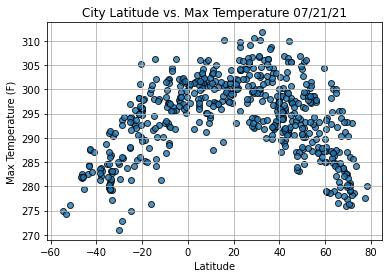

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## vs. Humidity

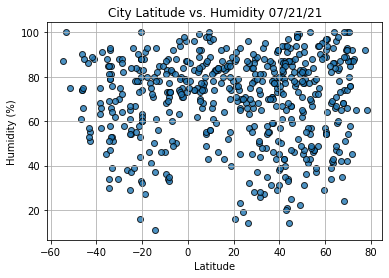

In [62]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## vs. Cloudiness

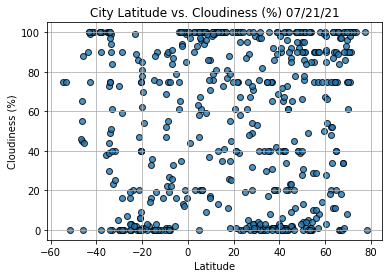

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## vs. Wind Speed

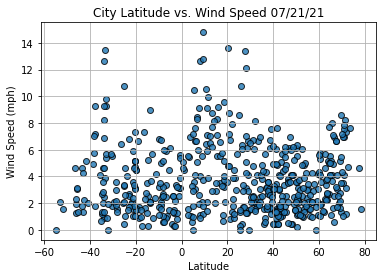

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()